# Assignment 6: Neural Networks  
You will continue work on the Digit Recognition problem in Kaggle.com this week.   As in Assignment 5, we will assess classification performance accuracy and processing time. Python TensorFlow should be used for Assignment 6. (If you experience difficulty installing TensorFlow, Python scikit-learn may be used as an alternative for Assignment 6.)
 ## The Benchmark Experiment
Tested neural network structures should be explored within a benchmark experiment, a factorial design with at least two levels on each of two experimental factors (at least a 2x2 completely crossed design). But due to the time required to fit each neural network, we will observe only one trial for each cell in the design.  You will build your models on train.csv and submit your forecasts for test.csv to Kaggle.com, providing your name and user ID for each experimental trial..

An example experiment could include two values for the number of nodes per inner layer and two values for the number of inner layers. Various machine learning hyperparameter settings may be used.

Students are encouraged to work in study teams on this assignment, with the understanding that each student must run the code himself/herself and write an independent report of the experimental results.  
## Management Question  
Suppose you are a financial institution evaluating machine learning technologies for optical character recognition. Initial testing is on the MNIST digits. What can you conclude from your benchmark study? Which neural network typology and hyperparameter settings would you recommend as being the most trustworthy?

# Setup & Data Ingest

## Imports

In [1]:
# Basic Manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import warnings

#Scikit-Learn
from sklearn.preprocessing import StandardScaler

# Deep Learning
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, RMSprop

Using TensorFlow backend.


## Dataframe Creation

In [0]:
# Read in train & test from google cloud storage
train_df = pd.read_csv('http://storage.googleapis.com/kaggle-digit-recognizer/train.csv')
test_df = pd.read_csv('http://storage.googleapis.com/kaggle-digit-recognizer/test.csv')

In [3]:
# Verify Dataframe creation
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Exploratory Data Analysis

## Summary Statistics

In [4]:
# View the shape of the dataframes
print(train_df.shape)
print(test_df.shape) # Missing label

(42000, 785)
(28000, 784)


In [5]:
# Review distribution of labels in train set
train_df.groupby('label')['label'].count()

label
0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

## Visualization

In [0]:
# Create function to display one image
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

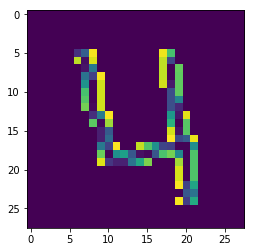

In [7]:
# Generate an image
gen_image(train_df.iloc[3, 1:].values)

# Modeling

## Neural Network 1:  
The first neural network was trained with the following parameters:  
* Five total layers (two hidden layers)
* Hidden layers contained 300 nodes each, output layer contained 10 nodes
* Relu activation function was used for initial layer and hidden layers, softmax was used on output layer
* Stochastic Gradient Descent optimizer was used

### Training

In [0]:
# Create training and testing
x_train, y_train = train_df.iloc[:, 1:], train_df['label']
x_test = test_df

In [9]:
# Observe the split to ensure it's correct
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(42000, 784)
(42000,)
(28000, 784)


In [0]:
# Scale the training data
std_scale = StandardScaler()
x_train_scaled = std_scale.fit_transform(x_train)

In [11]:
# Observe that the shape is still correct
x_train_scaled.shape

(42000, 784)

In [0]:
# Create parameter variables for training
batch_size = 100
num_classes = 10
epochs = 20

In [0]:
# Convert class vectors to binary class matrices
y_train_categorical = keras.utils.to_categorical(y_train, num_classes)

In [0]:
# Build model and add layers
model_sm = Sequential()
model_sm.add(Dense(784, activation='relu', input_shape=(784,)))
model_sm.add(Dense(300, activation='relu'))
model_sm.add(Dense(300, activation='relu'))
model_sm.add(Dense(num_classes, activation='softmax'))

In [15]:
# View summary chart of NN layers
model_sm.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                3010      
Total params: 944,250
Trainable params: 944,250
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model using categorical cross entropy and SGD optimizer
model_sm.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [57]:
# Train the NN & record the time
warnings.filterwarnings('ignore')
start = datetime.datetime.now()

history_one = model_sm.fit(x_train_scaled, y_train_categorical,
                           batch_size=batch_size,
                           epochs=epochs,
                           verbose=1)

end = datetime.datetime.now()
time_diff = end-start
print('Time to train = {}'.format(time_diff))

Epoch 1/20
42000/42000 [==============================] - 9s 222us/step - loss: 0.0106 - acc: 0.9995
Epoch 2/20
42000/42000 [==============================] - 9s 223us/step - loss: 0.0103 - acc: 0.9997
Epoch 3/20
42000/42000 [==============================] - 9s 226us/step - loss: 0.0098 - acc: 0.9997
Epoch 4/20
42000/42000 [==============================] - 9s 223us/step - loss: 0.0095 - acc: 0.9997
Epoch 5/20
42000/42000 [==============================] - 9s 223us/step - loss: 0.0092 - acc: 0.9997
Epoch 6/20
42000/42000 [==============================] - 9s 226us/step - loss: 0.0089 - acc: 0.9997
Epoch 7/20
42000/42000 [==============================] - 9s 226us/step - loss: 0.0086 - acc: 0.9997
Epoch 8/20
42000/42000 [==============================] - 9s 224us/step - loss: 0.0084 - acc: 0.9998
Epoch 9/20
42000/42000 [==============================] - 9s 220us/step - loss: 0.0082 - acc: 0.9998
Epoch 10/20
42000/42000 [==============================] - 9s 221us/step - loss: 0.0079 - a

In [58]:
# View the accuracy on the training data
score = model_sm.evaluate(x_train_scaled, y_train_categorical, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

Train loss: 0.006223656516073138
Train accuracy: 0.9998095238095238


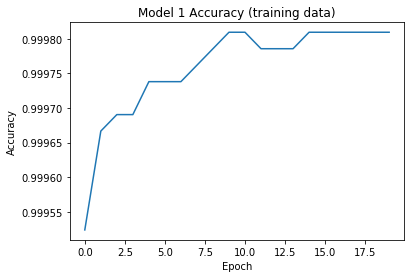

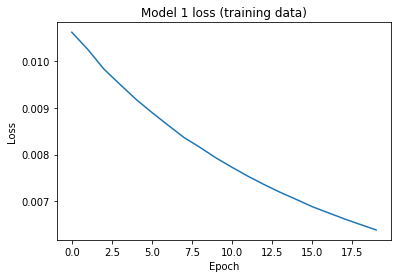

In [59]:
# Plot trainingaccuracy values
plt.plot(history_one.history['acc'])
plt.title('Model 1 Accuracy (training data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

# Plot training loss values
plt.plot(history_one.history['loss'])
plt.title('Model 1 loss (training data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

### Testing

In [43]:
# Create image id for submission
image_id = np.linspace(1, 28000, 28000, dtype=int)
image_id[0:11]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [0]:
# Scale the test data
x_test_scaled = std_scale.fit_transform(x_test)

In [0]:
# Make predictions
y_pred = model_sm.predict_classes(x_test_scaled)

In [0]:
# Create dataframe for easier write to csv
nn_1_submission = pd.DataFrame(
    {
        "ImageId": image_id,
        "Label": y_pred
    }
)

In [47]:
# Mount google drive and write the dataframe to csv
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Write to csv for submission
nn_1_submission.to_csv(
    "/content/gdrive/My Drive/northwestern/422-msds/week-06/nn_1_submission.csv",
    index=False
)

**Kaggle Results**  
Score = 0.96285

## Neural Network 2:  
The second neural network was trained with the following parameters:  
* Six total layers (three hidden layers)
* Hidden layers contained 300 nodes each, output layer contained 10 nodes
* Relu activation function was used for initial layer and hidden layers, softmax was used on output layer
* Stochastic Gradient Descent optimizer was used

### Training

In [0]:
# Create parameter variables for training
batch_size = 100
num_classes = 10
epochs = 20

In [0]:
# Build model and add layers
model_two = Sequential()
model_two.add(Dense(784, activation='relu', input_shape=(784,)))
model_two.add(Dense(300, activation='relu'))
model_two.add(Dense(300, activation='relu'))
model_two.add(Dense(300, activation='relu'))
model_two.add(Dense(num_classes, activation='softmax'))

In [51]:
# Summary
model_two.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_7 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_8 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                3010      
Total params: 1,034,550
Trainable params: 1,034,550
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model using categorical cross entropy and SGD optimizer
model_two.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy']
                 )

In [60]:
# Train the NN & record the time
warnings.filterwarnings('ignore')
start = datetime.datetime.now()

history_two = model_two.fit(x_train_scaled, 
                            y_train_categorical,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1)

end = datetime.datetime.now()
time_diff_two = end-start
print('Time to train = {}'.format(time_diff_two))

Epoch 1/20
42000/42000 [==============================] - 10s 235us/step - loss: 0.0215 - acc: 0.9967
Epoch 2/20
42000/42000 [==============================] - 10s 238us/step - loss: 0.0195 - acc: 0.9970
Epoch 3/20
42000/42000 [==============================] - 10s 236us/step - loss: 0.0177 - acc: 0.9975
Epoch 4/20
42000/42000 [==============================] - 10s 238us/step - loss: 0.0161 - acc: 0.9981
Epoch 5/20
42000/42000 [==============================] - 10s 248us/step - loss: 0.0148 - acc: 0.9983
Epoch 6/20
42000/42000 [==============================] - 10s 238us/step - loss: 0.0136 - acc: 0.9987
Epoch 7/20
42000/42000 [==============================] - 10s 233us/step - loss: 0.0125 - acc: 0.9989
Epoch 8/20
42000/42000 [==============================] - 10s 232us/step - loss: 0.0115 - acc: 0.9990
Epoch 9/20
42000/42000 [==============================] - 10s 235us/step - loss: 0.0107 - acc: 0.9993
Epoch 10/20
42000/42000 [==============================] - 10s 238us/step - loss: 

In [61]:
# View the accuracy on the training data
score_two = model_two.evaluate(x_train_scaled, y_train_categorical, verbose=0)
print('Train loss:', score_two[0])
print('Train accuracy:', score_two[1])

Train loss: 0.005679569779399095
Train accuracy: 0.9998333333333334


### Testing

In [0]:
# Make predictions
y_pred_two = model_two.predict_classes(x_test_scaled)

In [0]:
# Create dataframe for easier write to csv
nn_2_submission = pd.DataFrame(
    {
        "ImageId": image_id,
        "Label": y_pred_two
    }
)

In [0]:
# Write to csv for submission
nn_2_submission.to_csv(
    "/content/gdrive/My Drive/northwestern/422-msds/week-06/nn_2_submission.csv",
    index=False
)

**Kaggle Results**  
Score = 0.96414

## Neural Network 3:  
The third neural network was trained with the following parameters:  
* Five total layers (two hidden layers)
* Hidden layers contained 150 nodes each, output layer contained 10 nodes
* Relu activation function was used for initial layer and hidden layers, softmax was used on output layer
* Stochastic Gradient Descent optimizer was used

### Training

In [0]:
# Build model and add layers
model_three = Sequential()
model_three.add(Dense(784, activation='relu', input_shape=(784,)))
model_three.add(Dense(150, activation='relu'))
model_three.add(Dense(150, activation='relu'))
model_three.add(Dense(num_classes, activation='softmax'))

In [67]:
# Summary
model_three.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_11 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_12 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1510      
Total params: 757,350
Trainable params: 757,350
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model using categorical cross entropy and SGD optimizer
model_three.compile(loss='categorical_crossentropy',
                    optimizer=SGD(),
                    metrics=['accuracy']
                   )

In [69]:
# Train the NN & record the time
warnings.filterwarnings('ignore')
start = datetime.datetime.now()

history_three = model_three.fit(x_train_scaled, 
                                y_train_categorical,
                                batch_size=batch_size,
                                epochs=epochs,
                                verbose=1)

end = datetime.datetime.now()
time_diff_three = end-start
print('Time to train = {}'.format(time_diff_three))

Epoch 1/20
42000/42000 [==============================] - 8s 191us/step - loss: 0.7753 - acc: 0.7984
Epoch 2/20
42000/42000 [==============================] - 8s 180us/step - loss: 0.2839 - acc: 0.9199
Epoch 3/20
42000/42000 [==============================] - 8s 180us/step - loss: 0.2150 - acc: 0.9380
Epoch 4/20
42000/42000 [==============================] - 7s 173us/step - loss: 0.1785 - acc: 0.9494
Epoch 5/20
42000/42000 [==============================] - 7s 178us/step - loss: 0.1531 - acc: 0.9565
Epoch 6/20
42000/42000 [==============================] - 7s 178us/step - loss: 0.1336 - acc: 0.9624
Epoch 7/20
42000/42000 [==============================] - 8s 181us/step - loss: 0.1185 - acc: 0.9669
Epoch 8/20
42000/42000 [==============================] - 8s 183us/step - loss: 0.1062 - acc: 0.9705
Epoch 9/20
42000/42000 [==============================] - 8s 181us/step - loss: 0.0960 - acc: 0.9740
Epoch 10/20
42000/42000 [==============================] - 8s 184us/step - loss: 0.0868 - a

In [70]:
# View the accuracy on the training data
score_three = model_three.evaluate(x_train_scaled, y_train_categorical, verbose=0)
print('Train loss:', score_three[0])
print('Train accuracy:', score_three[1])

Train loss: 0.03350571062814976
Train accuracy: 0.9938571428571429


### Testing

In [0]:
# Make predictions
y_pred_three = model_three.predict_classes(x_test_scaled)

In [0]:
# Create dataframe for easier write to csv
nn_3_submission = pd.DataFrame(
    {
        "ImageId": image_id,
        "Label": y_pred_three
    }
)

In [0]:
# Write to csv for submission
nn_3_submission.to_csv(
    "/content/gdrive/My Drive/northwestern/422-msds/week-06/nn_3_submission.csv",
    index=False
)

**Kaggle Results**  
Score = 0.96057

## Neural Network 4:  
The fourth neural network was trained with the following parameters:  
* Six total layers (three hidden layers)
* Hidden layers contained 150 nodes each, output layer contained 10 nodes
* Relu activation function was used for initial layer and hidden layers, softmax was used on output layer
* Stochastic Gradient Descent optimizer was used

### Training

In [0]:
# Build model and add layers
model_four = Sequential()
model_four.add(Dense(784, activation='relu', input_shape=(784,)))
model_four.add(Dense(150, activation='relu'))
model_four.add(Dense(150, activation='relu'))
model_four.add(Dense(150, activation='relu'))
model_four.add(Dense(num_classes, activation='softmax'))

In [80]:
# Summary
model_four.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_19 (Dense)             (None, 150)               117750    
_________________________________________________________________
dense_20 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_21 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_22 (Dense)             (None, 10)                1510      
Total params: 780,000
Trainable params: 780,000
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compile the model using categorical cross entropy and SGD optimizer
model_four.compile(loss='categorical_crossentropy',
                   optimizer=SGD(),
                   metrics=['accuracy']
                  )

In [82]:
# Train the NN & record the time
warnings.filterwarnings('ignore')
start = datetime.datetime.now()

history_four = model_four.fit(x_train_scaled, 
                              y_train_categorical,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1)

end = datetime.datetime.now()
time_diff_four = end-start
print('Time to train = {}'.format(time_diff_four))

Epoch 1/20
42000/42000 [==============================] - 8s 191us/step - loss: 0.9098 - acc: 0.7623
Epoch 2/20
42000/42000 [==============================] - 8s 185us/step - loss: 0.2899 - acc: 0.9152
Epoch 3/20
42000/42000 [==============================] - 8s 183us/step - loss: 0.2129 - acc: 0.9377
Epoch 4/20
42000/42000 [==============================] - 8s 179us/step - loss: 0.1719 - acc: 0.9489
Epoch 5/20
42000/42000 [==============================] - 8s 184us/step - loss: 0.1441 - acc: 0.9581
Epoch 6/20
42000/42000 [==============================] - 8s 183us/step - loss: 0.1227 - acc: 0.9648
Epoch 7/20
42000/42000 [==============================] - 8s 185us/step - loss: 0.1064 - acc: 0.9699
Epoch 8/20
42000/42000 [==============================] - 8s 186us/step - loss: 0.0926 - acc: 0.9745
Epoch 9/20
42000/42000 [==============================] - 8s 185us/step - loss: 0.0817 - acc: 0.9775
Epoch 10/20
42000/42000 [==============================] - 8s 184us/step - loss: 0.0721 - a

In [83]:
# View the accuracy on the training data
score_four = model_four.evaluate(x_train_scaled, y_train_categorical, verbose=0)
print('Train loss:', score_four[0])
print('Train accuracy:', score_four[1])

Train loss: 0.020775798855792907
Train accuracy: 0.9970952380952381


### Testing

In [0]:
# Make predictions
y_pred_four = model_four.predict_classes(x_test_scaled)

In [0]:
# Create dataframe for easier write to csv
nn_4_submission = pd.DataFrame(
    {
        "ImageId": image_id,
        "Label": y_pred_four
    }
)

In [0]:
# Write to csv for submission
nn_4_submission.to_csv(
    "/content/gdrive/My Drive/northwestern/422-msds/week-06/nn_4_submission.csv",
    index=False
)

**Kaggle Results**  
Score = 0.96200

## Build Summary Table

In [89]:
nn_summary_df = pd.DataFrame(
    {
        "NumberOfHiddenLayers": [2, 3, 2, 3],
        "NumberOfNodesPerLayer": [300, 300, 150, 150],
        "Epochs": [20, 20, 20, 20],
        "BatchSize": [100, 100, 100, 100],
        "ProcessingTime": [time_diff, time_diff_two, time_diff_three, time_diff_four],
        "TrainingAccuracy": [score[1], score_two[1], score_three[1], score_four[1]],
        "TestAccuracy": [0.96285, 0.96414, 0.96057, 0.96200]
    },
    index=["Model_1", "Model_2", "Model_3", "Model_4"]
)

nn_summary_df

,NumberOfHiddenLayers,NumberOfNodesPerLayer,Epochs,BatchSize,ProcessingTime,TrainingAccuracy,TestAccuracy
Model_1,2,300,20,100,00:03:07.306478,0.999810,0.96285
Model_2,3,300,20,100,00:03:18.407091,0.999833,0.96414
Model_3,2,150,20,100,00:02:31.458782,0.993857,0.96057
Model_4,3,150,20,100,00:02:36.595157,0.997095,0.96200


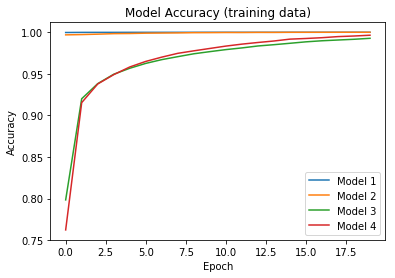

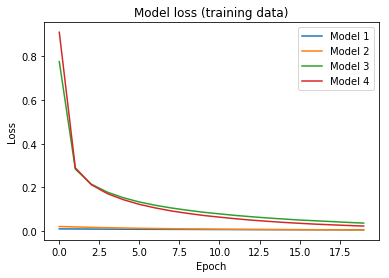

In [93]:
# Plot trainingaccuracy values
plt.plot(history_one.history['acc'])
plt.plot(history_two.history['acc'])
plt.plot(history_three.history['acc'])
plt.plot(history_four.history['acc'])
plt.title('Model Accuracy (training data)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.show()

# Plot training loss values
plt.plot(history_one.history['loss'])
plt.plot(history_two.history['loss'])
plt.plot(history_three.history['loss'])
plt.plot(history_four.history['loss'])
plt.title('Model loss (training data)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.show()

Text(0.5, 1.0, 'Model Training Time vs Accuracy')

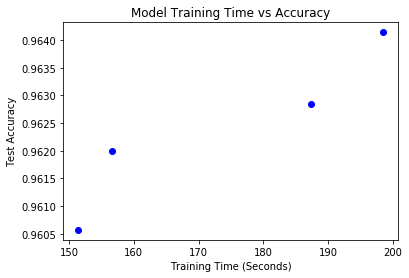

In [134]:
# Plot time to train vs test accuracy
plt.plot(nn_summary_df['ProcessingTime'] / np.timedelta64(1, 's')
         , nn_summary_df['TestAccuracy'], 
         'bo')
plt.xlabel('Training Time (Seconds)')
plt.ylabel('Test Accuracy')
plt.title('Model Training Time vs Accuracy')

# Conclusion  
Initial benchmark results reveal that there is not much difference in test accuracy between the four neural networks.  Two hyperparameters were adjusted to see the effect on accuracy and time to train.  If time is of no concern, it is recommended that management utilize the neural network (NN) trained with three hidden layers of 300 nodes each.  This NN took the longest to train, but yielded the highest accuracy on unseen digits (94.414% Accuracy).  If management is concerned with the time to train, then the NN with two hidden layers of 150 nodes each should be chosen.  This NN trained the fastest and yielded an accuracy slightly less than the previous (96.057%).